# Housing Sale Price Analysis in King County, WA

* Student name: Rebecca Frost-Brewer
* Student pace: Flex
* Scheduled project review date/time: April 22, 2022, 9AM
* Instructor name: Claude Fried


# Business Understanding

Emerald City Realtors serves the King County community, providing prospective home sellers with guidance on how to improve the value of their home prior to listing. 

* **Stakeholder**: Emerald City Realtors

* **Business Problem**: Emerald City Realtors need to provide prospective home sellers with guidance on how to improve the value of their home prior to listing, including the predicted increase in value expected based on improvements to particular features.

* **Business Question**: What features of their home can prospective home sellers change or improve to increase the value of their home, and by amount could this increase be specific to certain features?

These recommendations will be valuable to Emerald City Realtors because they will help prospective home sellers confidently ascertain how they can improve the value of their home, and if the investment is worth the cost.

# Data Understanding

This project uses the King County House Sales dataset because Emerald City Realtors and its prospective homesellers are all based in King County. The dataset includes all data of single-family home sales from 2014-2015. The dataset itself can be found in `kc_house_data.csv` in the data folder of this GitHub repository along with the descriptions of the features, found in `column_names.md` Further information about the features can be found on the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

The original dataset includes sales data for 21,597 homes with 20 different features, which include:

* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house
* `grade` - Overall grade of the house. Related to the construction and design of the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service


# Data Preparation

## Data Cleaning and Processing

### Import packages and libraries

In [1]:
# Import packages/libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

In [2]:
# Import data

kcdf = pd.read_csv("data/kc_house_data.csv")

In [3]:
# View first five entries

kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# View information on the dataset

kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# View summary statistics

kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We certainly have some outliers in our dataset we need to be wary of, including the homes with 33 bedrooms, 8 bathrooms, and 9400 square feet of living space.

Let's look more into the data.

### Data Processing

The real-world problem is providing data-driven advice on how prospective homesellers (of affordable homes) can increase the estimated value of their home, and by what amount. Emerald City Realtors serves all of King County, so the recommendations provided to homesellers need to be broad to encompass all of the county and not specific based on location. To that end, we can drop `zipcode`, `lat`, and `long`.

Further, sellers cannot control the size of their lot nor can they control the lot size or square feet of living space of their 15 closest neighbors.

Therefore, we can confidently drop these features from the dataframe.

To start, we can drop columns we know are not relevant or pertinent to our business problem:

* ID
* Sale date
* Zipcode, Latitude, and Longitude
* Lot size
* Lot size and living space of a home's 15 closest neighbords

In [6]:
kcdf = kcdf.drop(columns = ['date', 'id', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'zipcode', 'lat', 'long'])

In [7]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  object 
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.1+ MB


After dropping those columns, let's explore `sqft_basement` as it's currently coded as an object, but it should be similar to `sqft_living` as a numerical, continuous feature.

In [8]:
kcdf['sqft_basement'].isna().sum()

# Do we have any missing values?

0

In [9]:
kcdf['sqft_basement'].value_counts()

# Missing data represented by '?' - 454 observations missing data

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3500.0        1
768.0         1
248.0         1
1770.0        1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
kcdf.sqft_basement.value_counts(normalize = True)

# ? accounts for 2% of the data

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
3500.0    0.000046
768.0     0.000046
248.0     0.000046
1770.0    0.000046
666.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [11]:
# Replace the ? with 0.0 since it's such a small percentage and 60% of the dataset are 0.0s

kcdf['sqft_basement'].replace('?', 0.0, inplace = True)

In [12]:
# Make sure sqft_basement is an int, not float (to match sqft_above)

kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(float).astype(int)

In [13]:
kcdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

In [14]:
# Let's start with yr_renovated and try to figure out how to handle the missing yr_renovated values

print('Percentage of Null Yr Renovated Values:', len(kcdf[kcdf.yr_renovated.isna()])/ len(kcdf))
print('Number of Unique Yr Renovated Values:', kcdf.yr_renovated.nunique())

Percentage of Null Yr Renovated Values: 0.17789507802009538
Number of Unique Yr Renovated Values: 70


In considering what should we replace the NaN value with, if we don't know if or when it was renovated, we don't want to make any assumption without verifying records. To that end, let's drop those sales where renovation year is unknown.

In [15]:
kcdf.dropna(subset = ['yr_renovated'], inplace = True)

In [16]:
kcdf['yr_renovated'].isna().sum()

0

In [17]:
kcdf['yr_renovated'].value_counts()

# 17,011 homes have not been renovated

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
# Create new feature of reno_status, indicating whether it's been renovated or not

kcdf['reno_status'] = kcdf.yr_renovated.map(lambda x: 0 if x == 0 else 1)
kcdf.drop(['yr_renovated'], axis = 1, inplace = True)

In [19]:
kcdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       1946
view               51
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
reno_status         0
dtype: int64

In [20]:
# Cleaning waterfront

print('Percentage of Null Waterfront Values:', len(kcdf[kcdf.waterfront.isna()])/ len(kcdf))
print('Number of Unique Waterfront Values:', kcdf.waterfront.nunique())

Percentage of Null Waterfront Values: 0.1096029287524641
Number of Unique Waterfront Values: 2


In [21]:
kcdf.waterfront.value_counts(normalize = True)

NO     0.992346
YES    0.007654
Name: waterfront, dtype: float64

In [22]:
# Fill NaNs with 0

kcdf['waterfront'].replace("YES", 1, inplace = True)
kcdf['waterfront'].replace("NO", 0, inplace = True)
kcdf['waterfront'].fillna(value = 0, inplace = True)

In [23]:
kcdf.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
floors            0
waterfront        0
view             51
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
reno_status       0
dtype: int64

In [24]:
# Cleaning view

print('Percentage of Null View Values:', len(kcdf[kcdf.view.isna()])/ len(kcdf))
print('Number of Unique View Values:', kcdf.view.nunique())

Percentage of Null View Values: 0.0028724303013235707
Number of Unique View Values: 5


In [25]:
kcdf.view.value_counts(normalize = True)

NONE         0.902169
AVERAGE      0.044736
GOOD         0.022763
FAIR         0.015646
EXCELLENT    0.014686
Name: view, dtype: float64

In [26]:
kcdf['view'].fillna(value = 'NONE',inplace = True)
kcdf['view_YES'] = kcdf['view']
kcdf['view_YES'].replace('NONE', 0, inplace = True)
kcdf['view_YES'].replace(['AVERAGE','GOOD','FAIR', 'EXCELLENT'], 1, inplace = True)
kcdf.drop(columns = ['view'], inplace = True)

In [27]:
kcdf.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
reno_status      0
view_YES         0
dtype: int64

In [28]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17755 non-null  float64
 1   bedrooms       17755 non-null  int64  
 2   bathrooms      17755 non-null  float64
 3   sqft_living    17755 non-null  int64  
 4   floors         17755 non-null  float64
 5   waterfront     17755 non-null  float64
 6   condition      17755 non-null  object 
 7   grade          17755 non-null  object 
 8   sqft_above     17755 non-null  int64  
 9   sqft_basement  17755 non-null  int64  
 10  yr_built       17755 non-null  int64  
 11  reno_status    17755 non-null  int64  
 12  view_YES       17755 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.9+ MB


In [29]:
# Summary statistics

kcdf.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,reno_status,view_YES
count,1.775500e+04,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000
mean,5.406600e+05,3.378485,2.120515,2084.291017,1.495832,0.006815,1791.562996,286.886286,1971.107970,0.041904,0.097550
std,3.693006e+05,0.932816,0.767613,917.594197,0.538466,0.082273,826.690286,441.236519,29.352772,0.200375,0.296714
min,8.000000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,1570.000000,0.000000,1975.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,2220.000000,550.000000,1997.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,9410.000000,4820.000000,2015.000000,1.000000,1.000000


In [30]:
# Drop rows that contain any value in the list

kcdf = kcdf[(kcdf.bedrooms != 33)]

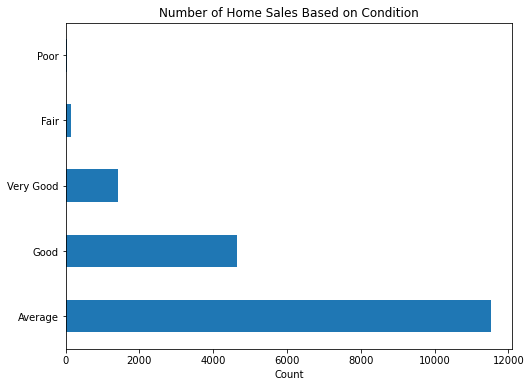

In [31]:
fig, ax = plt.subplots(figsize = (8,6))

kcdf['condition'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Condition')
ax.set_xlabel('Count');

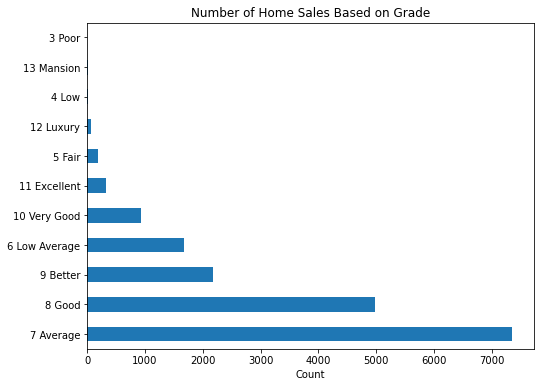

In [32]:
fig, ax = plt.subplots(figsize = (8,6))

kcdf['grade'].value_counts().plot(kind='barh')
ax.set_title('Number of Home Sales Based on Grade')
ax.set_xlabel('Count');

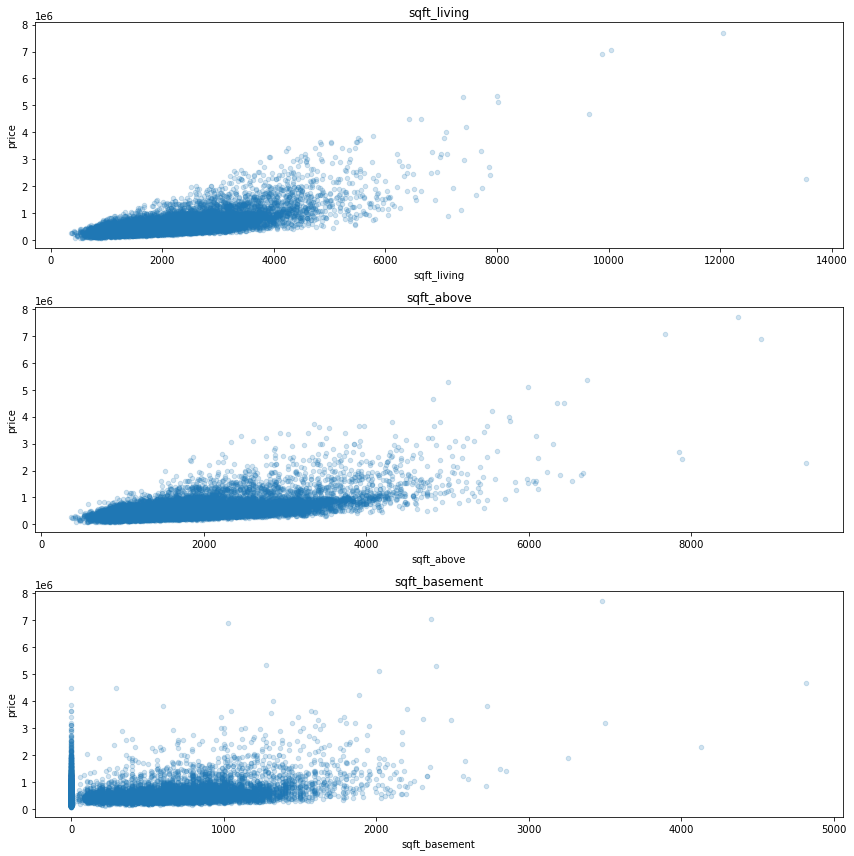

In [33]:
# Let's visualize our continuous variables to see relationship to sale price for exploratory purposes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

for xcol, ax in zip(['sqft_living', 'sqft_above', 'sqft_basement'], axes):
    kcdf.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha=0.2)
    
    ax.set_title(xcol)               
    
fig.tight_layout()

We can see we have a **linear relationship** between sale price and sqft_living, sqft_above, and sqft_basement.

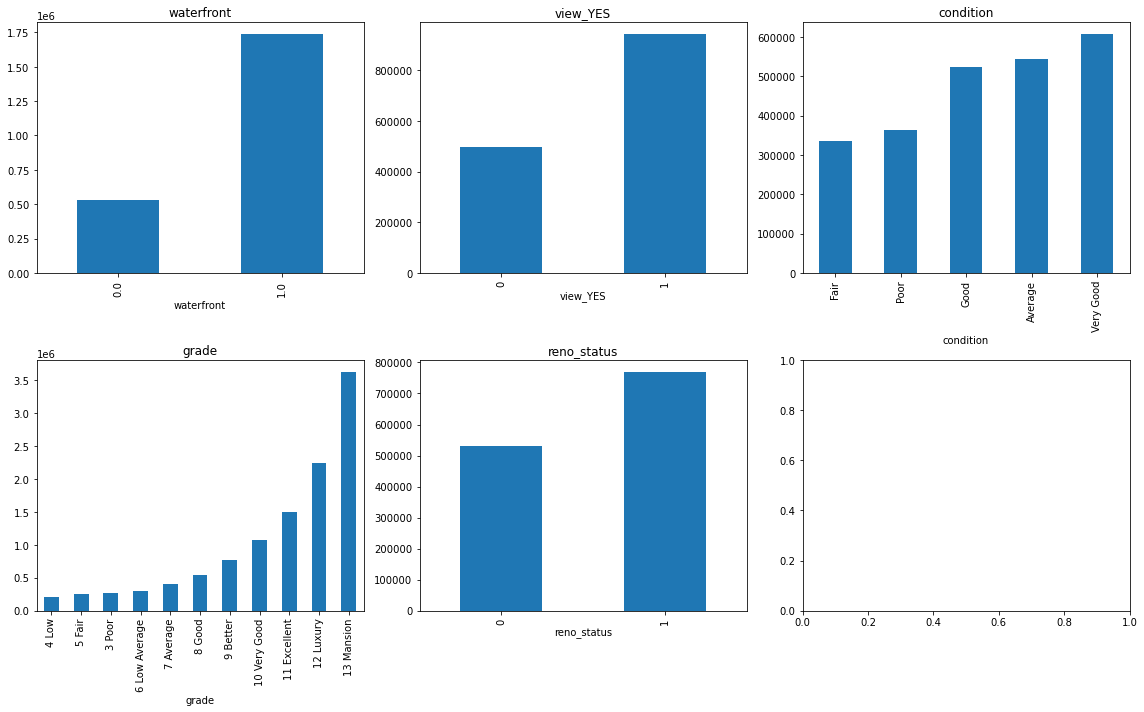

In [34]:
# Let's visualize our categorical variables to see relationship to mean sale price for exploratory purposes

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))

categoricals = ['waterfront', 'view_YES', 'condition', 'grade', 'reno_status']

for col, ax in zip(categoricals, axes.flatten()):
    (kcdf.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax = ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

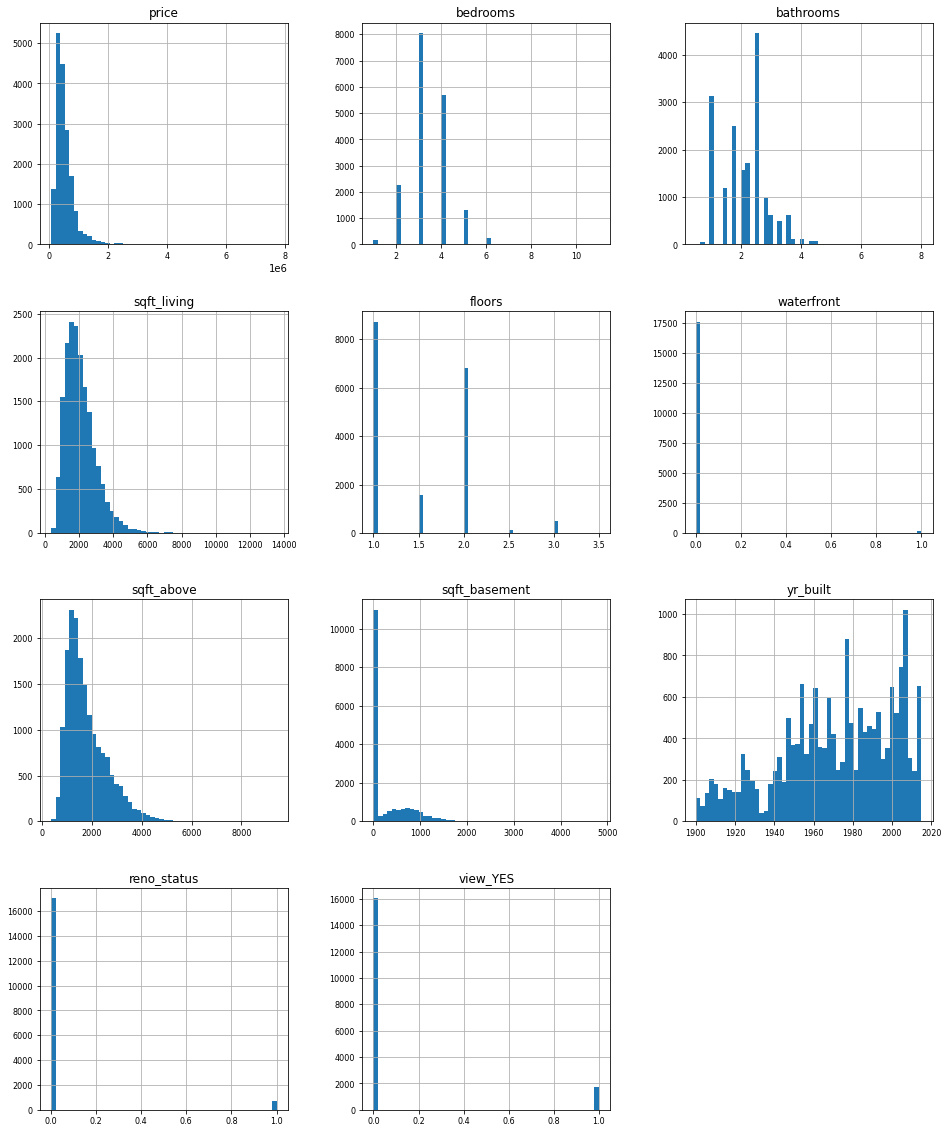

In [35]:
kcdf[kcdf.select_dtypes(exclude = object).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);

In [36]:
# Let's remove the 'price' outliers in the top 5% of the observations

kcdf = kcdf.query('price < price.quantile(.95)')

In [37]:
# Create our dummy variables for the categorical features

cond_dummies = pd.get_dummies(kcdf['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(kcdf['grade'], prefix = 'grade', drop_first = True)

# The one that's dropped is where the coef comes from - Grage 10 to Grade 5, lose
# No diff between a grade 10 and grade 13

In [38]:
cond_dummies.nunique()

# Condition 'Average' has been dropped - note for analyses

cond_Fair         2
cond_Good         2
cond_Poor         2
cond_Very Good    2
dtype: int64

In [39]:
grade_dummies.nunique()

# Grade '10 Very Good' has been dropped

grade_11 Excellent     2
grade_12 Luxury        2
grade_3 Poor           2
grade_4 Low            2
grade_5 Fair           2
grade_6 Low Average    2
grade_7 Average        2
grade_8 Good           2
grade_9 Better         2
dtype: int64

In [40]:
# Drop the original column and concatenate our dummy variable columns with our original dataframe

kcdf = kcdf.drop(['condition', 'grade'], axis = 1)
kcdf_clean = pd.concat([kcdf, cond_dummies, grade_dummies], axis = 1)

In [41]:
kcdf_clean.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,reno_status,...,cond_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,1.0,0.0,1180,0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,2.0,0.0,2170,400,1951,1,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,1.0,0.0,1050,910,1965,0,...,1,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,1.0,0.0,1680,0,1987,0,...,0,0,0,0,0,0,0,0,1,0
6,257500.0,3,2.25,1715,2.0,0.0,1715,0,1995,0,...,0,0,0,0,0,0,0,1,0,0
7,291850.0,3,1.50,1060,1.0,0.0,1060,0,1963,0,...,0,0,0,0,0,0,0,1,0,0
8,229500.0,3,1.00,1780,1.0,0.0,1050,730,1960,0,...,0,0,0,0,0,0,0,1,0,0
9,323000.0,3,2.50,1890,2.0,0.0,1890,0,2003,0,...,0,0,0,0,0,0,0,1,0,0
10,662500.0,3,2.50,3560,1.0,0.0,1860,1700,1965,0,...,0,0,0,0,0,0,0,0,1,0
11,468000.0,2,1.00,1160,1.0,0.0,860,300,1942,0,...,0,0,0,0,0,0,0,1,0,0


At this juncture, let's recall the real-world business problem. 

Business Problem: Emerald City Realtors need to provide prospective home sellers with guidance on how to improve the value of their home prior to listing, including the predicted increase in value expected based on improvements to particular features.

**Business Question**: What features of their home can prospective home sellers change or improve to increase the value of their home, and by amount could this increase be specific to certain features?

In [42]:
kcdf_clean.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,reno_status,...,cond_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
count,1.684100e+04,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,...,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000,16841.000000
mean,4.784573e+05,3.336797,2.058236,1981.968885,1.477792,0.002553,1713.057538,263.370109,1970.927736,0.037231,...,0.077430,0.006829,0.000238,0.000059,0.001069,0.011282,0.099757,0.436554,0.290600,0.115254
std,2.096220e+05,0.886414,0.709149,776.029791,0.535148,0.050467,727.430100,408.632801,29.140807,0.189332,...,0.267281,0.082355,0.015410,0.007706,0.032676,0.105619,0.299684,0.495973,0.454053,0.319338
min,8.000000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,1.000000,0.000000,1180.000000,0.000000,1952.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.384000e+05,3.000000,2.250000,1860.000000,1.000000,0.000000,1520.000000,0.000000,1975.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.035000e+05,4.000000,2.500000,2440.000000,2.000000,0.000000,2110.000000,500.000000,1996.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.140000e+06,11.000000,7.500000,7350.000000,3.500000,1.000000,5710.000000,2720.000000,2015.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Correlations

We are showing correlation and using regression coefficients in this analysis to be able to show the relationship between one or more features with sale price.

Using regression and interpreting correlation coefficients is effective for this business problem because it will allow for us to determine how sale price is impacted by different features and to what degree.

Building complex models with multiple features allows for us to be able to make more accurate, data-driven predictions.

In [43]:
# Let's check the correlations in an easy-to-read table
# 0.7-0.9 highly correlated
# 0.5-0.7 moderately correlated

kcdf_corrs = kcdf_clean.corr()['price'].map(abs).sort_values(ascending = False)
kcdf_corrs

# sqft_living = 0.62
# sqft_above = 0.53

price                  1.000000
sqft_living            0.624358
sqft_above             0.531152
bathrooms              0.455481
grade_9 Better         0.359567
grade_7 Average        0.326472
bedrooms               0.305316
grade_6 Low Average    0.279461
floors                 0.270794
view_YES               0.237265
sqft_basement          0.234678
grade_11 Excellent     0.182407
grade_8 Good           0.149111
grade_5 Fair           0.115550
reno_status            0.089191
cond_Fair              0.072800
yr_built               0.058579
cond_Very Good         0.050817
waterfront             0.045687
grade_4 Low            0.043184
grade_12 Luxury        0.034398
cond_Good              0.029987
cond_Poor              0.028587
grade_3 Poor           0.007958
Name: price, dtype: float64

This table of correlations shows that the square feet of living space has the strongest correlation with sale price at 0.624, followed by square feet of living space above ground and number of bathrooms, at 0.531 and 0.455, respectively.

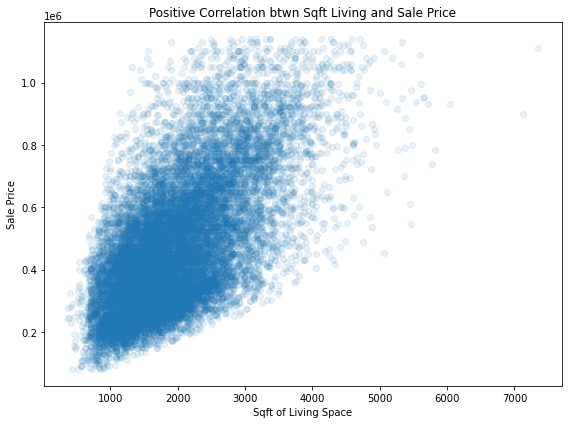

In [44]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(kcdf_clean['sqft_living'], kcdf_clean['price'], alpha = .1)
ax.set_xlabel('Sqft of Living Space')
ax.set_ylabel('Sale Price')
ax.set_title('Positive Correlation btwn Sqft Living and Sale Price')

plt.tight_layout()

In [45]:
# Let's look at multicollinearity and see which features are most highly correlated pairs

# Create a new dataframe of the absolute values of the correlations
pairs_df = kcdf_clean.corr().abs().stack().reset_index().sort_values(0, ascending=False)
pairs_df['pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['pairs'], inplace = True)
pairs_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
pairs_df.columns = ['cc']
pairs_df.drop_duplicates(inplace=True)

# Filter for correlation coefficients less than 1 and greater than 0.75
pairs_df[(pairs_df.cc>.75) & (pairs_df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.852245


Addressing multicollinearity is important to ensure our models are accurate and analyses are not noisy with highly correlated pairs clouding interpretations. Since the square foot of a home's living area and the square footage of a home in general are collinear, our models will not include `sqft_above`.

In [46]:
kcdf_clean.drop = kcdf.drop(columns = ['sqft_above'], inplace = True)

# Modeling

In [47]:
def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Display a the summary output of a linear regression model, with predictors X and target y.

    Also displays a QQ plot and residual plot by default. These can be toggled off.
    
    The function will add a constant to the predictors by default, and this can be toggled off.
    """
    # Run a linear regression and display the summary
    if add_constant:
        X_sm = sm.add_constant(X, has_constant='add')
    else:
        X_sm = X
    model = sm.OLS(y, X_sm).fit()
    display(model.summary())

    # Display a QQ plot
    if qq:
        fig_qq = sm.graphics.qqplot(model.resid, line='45', fit=True,)
        fig_qq.suptitle('QQ plot for residual normality check')
    else:
        pass

    # Display a plot of predicted values vs. residuals
    if sced:    
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10,5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2)
        ax.plot(preds, [0 for i in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value");
    else:
        pass
    lr = LinearRegression()
    lr.fit(X_sm, y)
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model Mean Absolute Error: {metrics.mean_absolute_error(y, lr.predict(X_sm))}')
    
    
# Code reference: https://github.com/zshoorbajee/King-County-House-Sales-Flatiron-Project2/
# blob/main/King_County_analysis.ipynb

## Baseline Model

This is our extremely simple model we will use for comparison throughout our investigation on the features that may affect sale price and to what degree.

**Predictors**:

* `sqft_living`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:04   Log-Likelihood:            -2.2609e+05
No. Observations:               16841   AIC:                         4.522e+05
Df Residuals:                   16839   BIC:                         4.522e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.442e+05   3460.955     41.663      0.000    1.37e+05    1.51e+05
sqft_living   168.6521      1.626    103.720      0.000     165.465     171.839
==============================================================================
Omnibus:                      755.057   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.157
Skew:                           0.543   Prob(JB):                    2.73e-187
Kurtosis:                       3.215   Cond. No.                     5.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.38978633114995964
Model Mean Absolute Error: 131878.02042832618


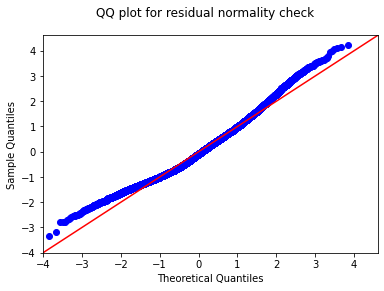

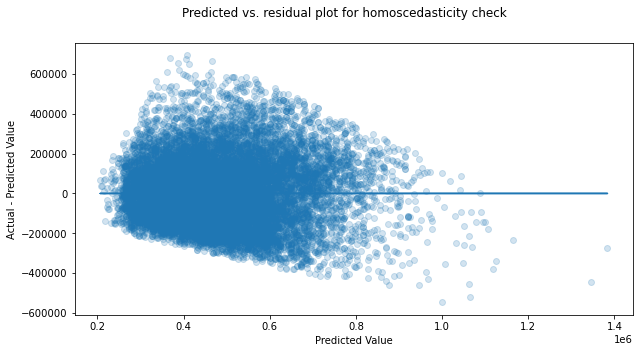

In [48]:
# Create our X and y for the baseline model
y_target = kcdf_clean['price']
X_baseline = kcdf_clean['sqft_living']

# Run the model
reg_qq_sced(y_target, X_baseline)

### Regression Results: Baseline Model

**Findings**

* An R-squared of 38.98%. That is, the proportion of the variance of price that is explained by `sqft_living` is only 38.98%, which is subpar.
* The Mean Absolute Error (MAE) is a model performance metric that reflects the mean of the absolute values of the individual prediction errors on over all instances in the model. We're using this performance metric throughout this analysis because its value is directly reportable to our clients in clearly conveying business use.
    * In this model, the MAE is 131878.02, which is pretty high



### Checking Assumptions and Limitations of the Baseline Model


#### Linearity
As we demonstrated already, there is a strong, positive linear relationship between sqft_living and sale price, so the **linearity assumption is met**.

#### Normality of Residual Distribution
We can see from the Q-Q plot above that our redisuals are normally distributed and its Durbin-Watson score is 1.981 (which is well within the accepted range of 1.5 to 2.5. Thus, this model **meets the normality assumption**.

#### Homoscedasticity
We need to check homoscedasticity, which indicates whether a dependent variable's variability is equal across values of the independent variable. Given our plot above this model **does not meet the homoscedasticity assumption.**


## Iterative Model 1: Modeling with Selected Home Features

What features of their home can prospective home sellers change or improve to increase the value of their home, and by amount could this increase be specific to certain features?

This first iterative model, building off the baseline, adds additional features to determine if these additions improve our model's metrics and to what end. 

**Predictors**:

* `bedrooms`
* `bathrooms`
* `floors`
* `sqft_basement`
* `sqft_living`
* `reno_status`


We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1936.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:04   Log-Likelihood:            -2.2583e+05
No. Observations:               16841   AIC:                         4.517e+05
Df Residuals:                   16834   BIC:                         4.517e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.622e+05   5616.874     28.877      0.000    1.51e+05    1.73e+05
bedrooms      -2.547e+04   1787.162    -14.251      0.000    -2.9e+04    -2.2e+04
bathrooms     -2296.1696   2790.990     -0.823      0.411   -7766.803    3174.464
sqft_living     174.4074      2.626     66.410      0.000     169.260     179.555
floors         3.434e+04   3093.891     11.099      0.000    2.83e+04    4.04e+04
sqft_basement    24.5623      3.781      6.496      0.000      17.151      31.973
reno_status    8.273e+04   6572.119     12.589      0.000    6.99e+04    9.56e+04
==============================================================================
Omnibus:                      798.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.547
Skew:                           0.549   Prob(JB):                    3.47e-200
Kurtosis:                       3.319   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.4081356403391919
Model Mean Absolute Error: 129251.95815157503


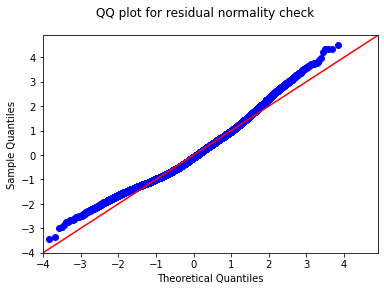

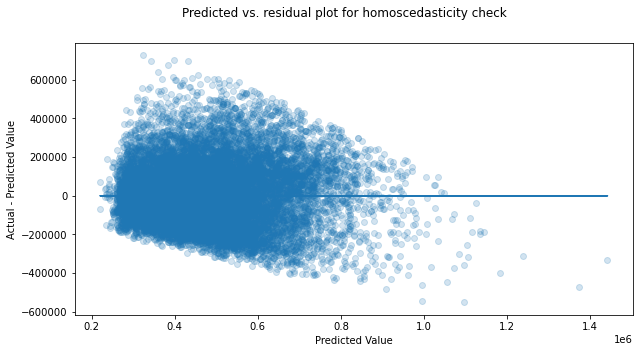

In [49]:
# Create our new X for this model
X_quant_features = kcdf_clean[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'reno_status']]

reg_qq_sced(y_target, X_quant_features)

### Regression Results: Modeling with the Quantitative Features of a Home

**Findings**

* Adjusted R-squared is 40.8%, which is slightly worse than our baseline model
* The MAE is 129251.96, which is lower than our baseline (131878.02)


### Checking Assumptions of the Baseline Model

#### Linearity

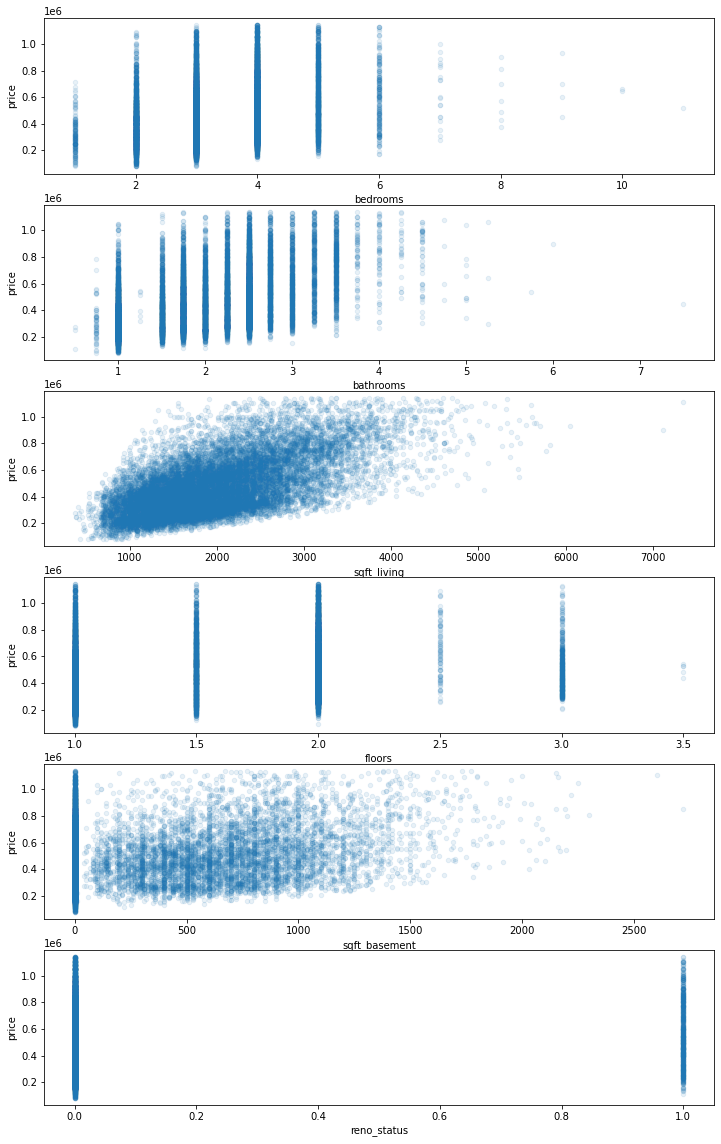

In [50]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12,20))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'reno_status'], axes):
    kcdf_clean.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.1)

This model **does meet the linearity assumption**, which a linear relationship between the variables.

#### Normality
We can see from the Q-Q plot above and the D-W score of 1.976 that this model **meets the normality assumption**.

#### Homoscedasticity
Given our plot above and the results of the Goldfeld-Quandt test below, the variability of price is not equal; this model is heteroscedastic, thus **does not meet the homoscedasticity assumption.**

In [51]:
# Run Goldfeld Quandt test to further confirm homoscedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_quant_features)
list(zip(name, test))

[('F statistic', 0.9662826303513792), ('p-value', 0.9421455969736077)]

Since `bathrooms` does not seem to have a statistically significant linear relationship with sale price, let's drop this feature from this model to see how the metrics are affected. Further, let's remove the top 5% of price outliers in our dataframe.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2324.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:07   Log-Likelihood:            -2.2583e+05
No. Observations:               16841   AIC:                         4.517e+05
Df Residuals:                   16835   BIC:                         4.517e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.619e+05   5608.383     28.876      0.000    1.51e+05    1.73e+05
bedrooms      -2.571e+04   1762.742    -14.585      0.000   -2.92e+04   -2.23e+04
sqft_living     173.4023      2.325     74.590      0.000     168.846     177.959
floors         3.328e+04   2814.900     11.824      0.000    2.78e+04    3.88e+04
sqft_basement    24.1514      3.748      6.444      0.000      16.805      31.497
reno_status    8.263e+04   6570.963     12.576      0.000    6.98e+04    9.55e+04
==============================================================================
Omnibus:                      800.228   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              921.265
Skew:                           0.550   Prob(JB):                    8.91e-201
Kurtosis:                       3.318   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.408147001314231
Model Mean Absolute Error: 129261.08911725445


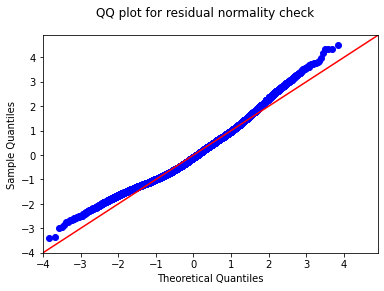

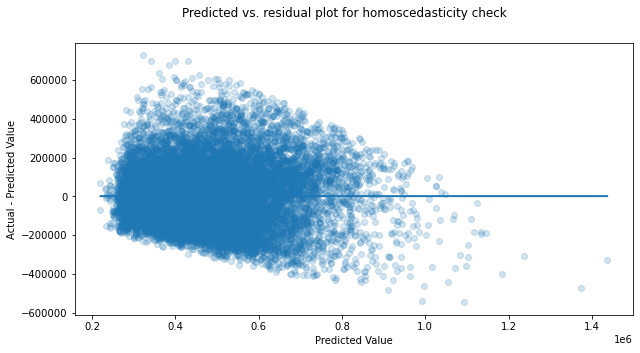

In [52]:
# Recall our y variable and create our new X for this model
X2_quant_features = kcdf_clean[['bedrooms', 'sqft_living', 'floors', 'sqft_basement', 'reno_status']]

reg_qq_sced(y_target, X2_quant_features)

**Findings**

* Adjusted R-squared is 40.8%
* The MAE is 129261.09, which is a tiny bit higher than the previous model


## Iterative Model 2: Considering Additional Home Features

What features of their home can prospective home sellers change or improve to increase the value of their home, and by amount could this increase be specific to certain features?

This model will assess the another set features of a home: the grade of the home (i.e., the construction quality of the home including materials and workmanship) and the condition of the home (i.e., condition relative to the age and grade of the home) in conjunction with square footage of living space.

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. 

We will use our filtered dataset that does not include outliers.

**Predictors**:

* `sqft_living`
* `grade`
* `condition`
* `waterfront`
* `view_YES`



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1056.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:08   Log-Likelihood:            -2.2439e+05
No. Observations:               16841   AIC:                         4.488e+05
Df Residuals:                   16824   BIC:                         4.490e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.07e+05   9139.852     55.476      0.000    4.89e+05    5.25e+05
sqft_living            85.7173      2.108     40.666      0.000      81.586      89.849
cond_Fair            -1.83e+04   1.26e+04     -1.447      0.148   -4.31e+04    6485.953
cond_Good            3.526e+04   2686.544     13.123      0.000       3e+04    4.05e+04
cond_Poor            8258.6019   3.18e+04      0.259      0.795   -5.42e+04    7.07e+04
cond_Very Good       9.629e+04   4402.424     21.872      0.000    8.77e+04    1.05e+05
grade_11 Excellent   7.581e+04    1.5e+04      5.040      0.000    4.63e+04    1.05e+05
grade_12 Luxury     -2.684e+04   7.44e+04     -0.361      0.718   -1.73e+05    1.19e+05
grade_3 Poor        -3.859e+05   1.48e+05     -2.600      0.009   -6.77e+05    -9.5e+04
grade_4 Low         -3.748e+05    3.6e+04    -10.409      0.000   -4.45e+05   -3.04e+05
grade_5 Fair        -3.758e+05   1.33e+04    -28.189      0.000   -4.02e+05    -3.5e+05
grade_6 Low Average -3.341e+05   8313.317    -40.191      0.000    -3.5e+05   -3.18e+05
grade_7 Average     -2.756e+05   7071.698    -38.969      0.000   -2.89e+05   -2.62e+05
grade_8 Good        -1.897e+05   6699.281    -28.315      0.000   -2.03e+05   -1.77e+05
grade_9 Better      -8.339e+04   6829.045    -12.210      0.000   -9.68e+04      -7e+04
waterfront            1.21e+05    2.3e+04      5.258      0.000    7.59e+04    1.66e+05
view_YES             9.241e+04   4431.230     20.855      0.000    8.37e+04    1.01e+05
==============================================================================
Omnibus:                      840.532   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.715
Skew:                           0.530   Prob(JB):                    6.15e-222
Kurtosis:                       3.573   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.5007100383562235
Model Mean Absolute Error: 116878.73436987853


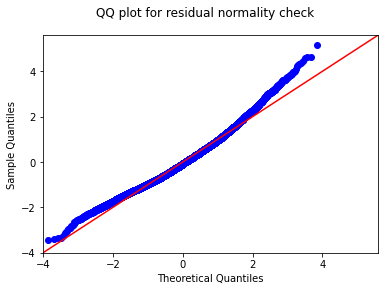

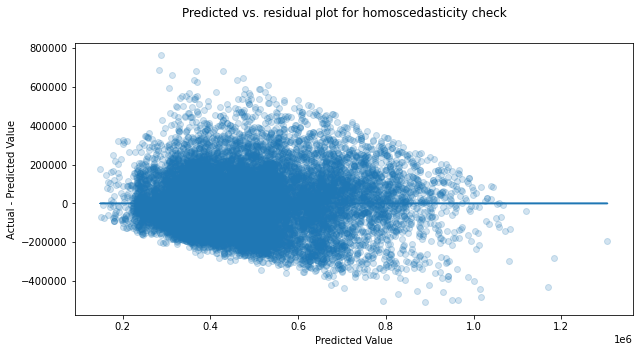

In [53]:
X_quality = kcdf_clean[['sqft_living',
                      'cond_Fair',
                      'cond_Good',
                      'cond_Poor',
                      'cond_Very Good',
                      'grade_11 Excellent',
                      'grade_12 Luxury',
                      'grade_3 Poor',
                      'grade_4 Low',
                      'grade_5 Fair',
                      'grade_6 Low Average',
                      'grade_7 Average',
                      'grade_8 Good',
                      'grade_9 Better',
                      'waterfront',
                      'view_YES']]

reg_qq_sced(y_target, X_quality)

### Regression Results: Qualitative Home Features Model

**Findings**

* Adjusted R-squared is up to 50.1%
* The MAE improved to 116878.73 (from the baseline of 131878.02)

However, it looks like `cond_Fair`, `cond_Poor`, and `grade_12 Luxury` do not have a statistically significant linear relationship with sale price in this model of features.


### Checking Assumptions of the Qualitative Home Features Model

#### Linearity

This model does meet the linearity assumption, which a linear relationship between the variables.

#### Normality

We can see from the Q-Q plot above and the D-W score of 1.980 that this model **meets the normality assumption**.

#### Homoscedasticity

Based on the plot above and the GQ test results, this model still **fails the homoscedasticity assumption**.

In [54]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_quality)
list(zip(name, test))

[('F statistic', 0.995521179067979), ('p-value', 0.5815109960394629)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1300.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:08   Log-Likelihood:            -2.2439e+05
No. Observations:               16841   AIC:                         4.488e+05
Df Residuals:                   16827   BIC:                         4.489e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.068e+05   9138.212     55.461      0.000    4.89e+05    5.25e+05
sqft_living            85.7161      2.105     40.722      0.000      81.590      89.842
cond_Good            3.553e+04   2677.230     13.272      0.000    3.03e+04    4.08e+04
cond_Very Good       9.659e+04   4395.551     21.974      0.000     8.8e+04    1.05e+05
grade_11 Excellent   7.602e+04    1.5e+04      5.057      0.000    4.66e+04    1.05e+05
grade_3 Poor         -3.86e+05   1.48e+05     -2.601      0.009   -6.77e+05   -9.51e+04
grade_4 Low         -3.783e+05   3.59e+04    -10.551      0.000   -4.49e+05   -3.08e+05
grade_5 Fair        -3.766e+05   1.33e+04    -28.398      0.000   -4.03e+05   -3.51e+05
grade_6 Low Average -3.345e+05   8298.110    -40.314      0.000   -3.51e+05   -3.18e+05
grade_7 Average     -2.756e+05   7065.331    -39.009      0.000   -2.89e+05   -2.62e+05
grade_8 Good        -1.896e+05   6691.103    -28.333      0.000   -2.03e+05   -1.76e+05
grade_9 Better      -8.323e+04   6817.336    -12.208      0.000   -9.66e+04   -6.99e+04
waterfront           1.214e+05    2.3e+04      5.277      0.000    7.63e+04    1.66e+05
view_YES             9.241e+04   4430.916     20.857      0.000    8.37e+04    1.01e+05
==============================================================================
Omnibus:                      837.954   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1014.858
Skew:                           0.529   Prob(JB):                    4.23e-221
Kurtosis:                       3.572   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.5007305768781098
Model Mean Absolute Error: 116901.07071529844


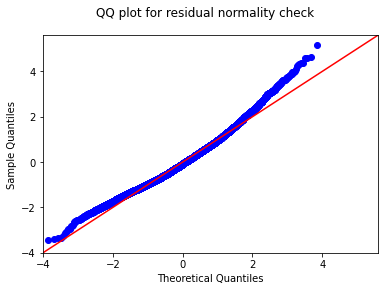

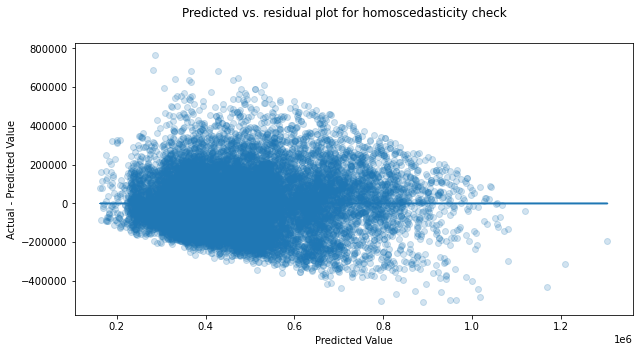

In [55]:
# Run again dropping cond_Fair, cond_Poor, and grade_12 Luxury

X2_quality = kcdf_clean[['sqft_living',
                      'cond_Good',
                      'cond_Very Good',
                      'grade_11 Excellent',
                      'grade_3 Poor',
                      'grade_4 Low',
                      'grade_5 Fair',
                      'grade_6 Low Average',
                      'grade_7 Average',
                      'grade_8 Good',
                      'grade_9 Better',
                      'waterfront',
                      'view_YES']]

reg_qq_sced(y_target, X2_quality)

**Findings**

* Adjusted R-squared stays at 50.1%%
* The MAE is 116901.07


### Checking Assumptions of the Qualitative Home Features Model

#### Linearity

As with our other models, the **linearity assumption is met**.

#### Normality

We can see from the Q-Q plot above and the D-W score of 1.980 that this model **meets the normality assumption**.

#### Homoscedasticity

Based on the plot above and the GQ test results, this model still **fails the homoscedasticity assumption**.

In [56]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X2_quality)
list(zip(name, test))

[('F statistic', 0.9952907497278097), ('p-value', 0.5856660152394448)]

## Iterative Model 3: Considering Most Influential Home Features

What features of their home can prospective home sellers change or improve to increase the value of their home, and by amount could this increase be specific to certain features?

This model will assess the another set features of a home including some of the most influential home features.

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. 

We will use our filtered dataset that does not include outliers.

**Predictors**:

* `sqft_living`
* `cond_Good`
* `cond_Very Good`
* `grade_11 Excellent`
* `sqft_living`
* `floors`


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1611.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:09   Log-Likelihood:            -2.2546e+05
No. Observations:               16841   AIC:                         4.509e+05
Df Residuals:                   16832   BIC:                         4.510e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.758e+04   4655.921     18.810      0.000    7.85e+04    9.67e+04
sqft_living           75.7547      0.864     87.710      0.000      74.062      77.448
cond_Good           3.023e+04   2938.607     10.287      0.000    2.45e+04     3.6e+04
cond_Very Good      7.979e+04   4708.511     16.946      0.000    7.06e+04     8.9e+04
grade_11 Excellent  1.475e+05   1.51e+04      9.766      0.000    1.18e+05    1.77e+05
sqft_living           75.7547      0.864     87.710      0.000      74.062      77.448
floors              4.322e+04   2543.053     16.994      0.000    3.82e+04    4.82e+04
reno_status         8.529e+04   6459.055     13.205      0.000    7.26e+04    9.79e+04
waterfront          8.078e+04   2.45e+04      3.295      0.001    3.27e+04    1.29e+05
view_YES            1.063e+05   4725.338     22.485      0.000     9.7e+04    1.16e+05
==============================================================================
Omnibus:                      607.160   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.621
Skew:                           0.478   Prob(JB):                    3.22e-147
Kurtosis:                       3.218   Cond. No.                     3.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model adjusted R-squared: 0.4334538660211019
Model Mean Absolute Error: 127263.1915568719


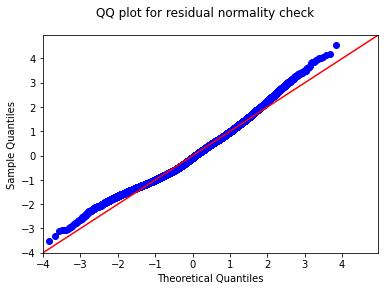

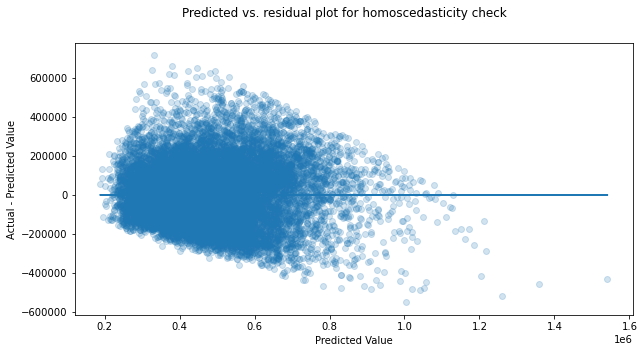

In [57]:
X_influ = kcdf_clean[['sqft_living', 'cond_Good', 'cond_Very Good', 'grade_11 Excellent', 'sqft_living',
                      'floors', 'reno_status', 'waterfront', 'view_YES']]
reg_qq_sced(y_target, X_influ)

### Regression Results: Qualitative Home Features Model

**Findings**

* Adjusted R-squared is down to 43.3%
* The MAE back up to 27263.20


### Checking Assumptions of the Qualitative Home Features Model

#### Linearity

As with previous models, this **assumption is met**.

#### Normality

We can see from the Q-Q plot above and the D-W score of 1.985 that this model **meets the normality assumption**.

#### Homoscedasticity

Based on the plot above and the GQ test results, this model still **fails the homoscedasticity assumption**.

In [58]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_influ)
list(zip(name, test))

[('F statistic', 0.9743529108103266), ('p-value', 0.8832642906077289)]

## Iterative Model 4: Considering All Home Features

To best advise the lead executives of Emerald City Realtors on actions prospectice homesellers can take to increase the estimated value of their home, and by what amount, this model will assess all home features that homesellers can change or improve upon to increase the price of their home.

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. This model looks at all features homesellers have control over.

In [59]:
kcdf_clean.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,reno_status,...,cond_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,1.0,0.0,1180,0,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,2.0,0.0,2170,400,1951,1,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,1.0,0.0,1050,910,1965,0,...,1,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,1.0,0.0,1680,0,1987,0,...,0,0,0,0,0,0,0,0,1,0
6,257500.0,3,2.25,1715,2.0,0.0,1715,0,1995,0,...,0,0,0,0,0,0,0,1,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1037.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:10   Log-Likelihood:            -2.2303e+05
No. Observations:               16841   AIC:                         4.461e+05
Df Residuals:                   16818   BIC:                         4.463e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.635e+06   1.05e+05     53.749      0.000    5.43e+06    5.84e+06
sqft_living            81.1848      2.778     29.228      0.000      75.740      86.629
sqft_basement          19.2980      3.396      5.682      0.000      12.641      25.955
bedrooms            -1.455e+04   1575.004     -9.238      0.000   -1.76e+04   -1.15e+04
bathrooms             2.87e+04   2599.741     11.038      0.000    2.36e+04    3.38e+04
floors               4.092e+04   2741.963     14.923      0.000    3.55e+04    4.63e+04
yr_built            -2614.7090     53.465    -48.905      0.000   -2719.506   -2509.912
cond_Poor           -4.148e+04   2.94e+04     -1.411      0.158   -9.91e+04    1.61e+04
cond_Fair           -4.684e+04   1.17e+04     -4.005      0.000   -6.98e+04   -2.39e+04
cond_Good            9714.2564   2638.559      3.682      0.000    4542.403    1.49e+04
cond_Very Good       3.922e+04   4293.975      9.135      0.000    3.08e+04    4.76e+04
grade_12 Luxury     -4.081e+04   6.87e+04     -0.594      0.552   -1.75e+05    9.38e+04
grade_11 Excellent   7.422e+04   1.39e+04      5.337      0.000     4.7e+04    1.01e+05
grade_3 Poor        -4.821e+05   1.37e+05     -3.521      0.000   -7.51e+05   -2.14e+05
grade_4 Low         -4.602e+05   3.33e+04    -13.815      0.000   -5.25e+05   -3.95e+05
grade_5 Fair        -4.553e+05   1.26e+04    -36.222      0.000    -4.8e+05   -4.31e+05
grade_6 Low Average -4.042e+05   8095.531    -49.931      0.000    -4.2e+05   -3.88e+05
grade_7 Average     -3.099e+05   6897.253    -44.927      0.000   -3.23e+05   -2.96e+05
grade_8 Good        -2.066e+05   6400.136    -32.287      0.000   -2.19e+05   -1.94e+05
grade_9 Better       -8.26e+04   6356.788    -12.994      0.000   -9.51e+04   -7.01e+04
waterfront           1.097e+05   2.13e+04      5.157      0.000     6.8e+04    1.51e+05
view_YES             5.857e+04   4183.186     14.001      0.000    5.04e+04    6.68e+04
reno_status          6165.6790   5924.177      1.041      0.298   -5446.331    1.78e+04
==============================================================================
Omnibus:                      640.194   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.462
Skew:                           0.381   Prob(JB):                    4.41e-199
Kurtosis:                       3.849   Cond. No.                     3.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.5751710709533122
Model Mean Absolute Error: 106252.8566444182


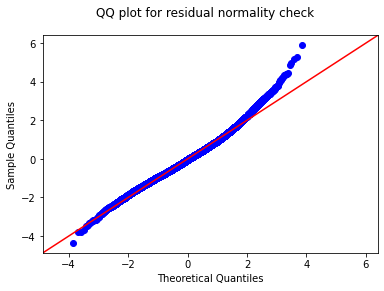

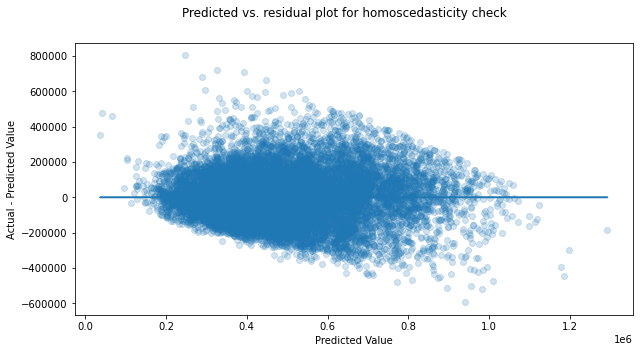

In [60]:
X_preds = kcdf_clean[['sqft_living',
                      'sqft_basement',
                      'bedrooms',
                      'bathrooms',
                      'floors',
                      'yr_built',
                      'cond_Poor',
                      'cond_Fair',
                      'cond_Good',
                      'cond_Very Good',
                      'grade_12 Luxury',
                      'grade_11 Excellent',
                      'grade_3 Poor',
                      'grade_4 Low',
                      'grade_5 Fair',
                      'grade_6 Low Average',
                      'grade_7 Average',
                      'grade_8 Good',
                      'grade_9 Better',
                      'waterfront',
                      'view_YES',
                      'reno_status']]


reg_qq_sced(y_target, X_preds)

### Regression Results: All Home Features

**Findings**

* Adjusted R-squared is up to 57.5%
* The MAE is at 106252.86

However, it looks like `cond_Poor`, `grade_12 Luxury`, and `reno_status` do not have a statistically significant linear relationship with sale price in this model of features.


### Checking Assumptions of the All Home Features

#### Linearity

As with previous models, this **assumption is met**.

#### Normality

We can see from the Q-Q plot above and the D-W score of 1.975 that this model **meets the normality assumption**.

#### Homoscedasticity

Based on the plot above and the GQ test results, this model still **fails the homoscedasticity assumption**.

In [61]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_preds)
list(zip(name, test))

[('F statistic', 0.9756939315085166), ('p-value', 0.8702318242455958)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1201.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:45:10   Log-Likelihood:            -2.2303e+05
No. Observations:               16841   AIC:                         4.461e+05
Df Residuals:                   16821   BIC:                         4.463e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.665e+06   9.93e+04     57.065      0.000    5.47e+06    5.86e+06
sqft_living            81.1202      2.773     29.252      0.000      75.685      86.556
sqft_basement          19.2942      3.394      5.685      0.000      12.642      25.947
bedrooms            -1.459e+04   1572.479     -9.281      0.000   -1.77e+04   -1.15e+04
bathrooms            2.902e+04   2577.267     11.259      0.000     2.4e+04    3.41e+04
floors               4.104e+04   2740.736     14.972      0.000    3.57e+04    4.64e+04
yr_built            -2630.0330     50.575    -52.003      0.000   -2729.165   -2530.901
cond_Fair           -4.684e+04   1.17e+04     -4.008      0.000   -6.98e+04   -2.39e+04
cond_Good            9503.4370   2611.465      3.639      0.000    4384.691    1.46e+04
cond_Very Good       3.881e+04   4250.634      9.131      0.000    3.05e+04    4.71e+04
grade_11 Excellent    7.44e+04   1.39e+04      5.354      0.000    4.72e+04    1.02e+05
grade_3 Poor        -4.822e+05   1.37e+05     -3.522      0.000   -7.51e+05   -2.14e+05
grade_4 Low         -4.623e+05   3.33e+04    -13.897      0.000   -5.28e+05   -3.97e+05
grade_5 Fair        -4.566e+05   1.25e+04    -36.430      0.000   -4.81e+05   -4.32e+05
grade_6 Low Average -4.043e+05   8092.167    -49.962      0.000    -4.2e+05   -3.88e+05
grade_7 Average     -3.096e+05   6892.061    -44.922      0.000   -3.23e+05   -2.96e+05
grade_8 Good        -2.063e+05   6390.696    -32.278      0.000   -2.19e+05   -1.94e+05
grade_9 Better      -8.218e+04   6343.853    -12.954      0.000   -9.46e+04   -6.97e+04
waterfront             1.1e+05   2.12e+04      5.182      0.000    6.84e+04    1.52e+05
view_YES             5.855e+04   4183.153     13.996      0.000    5.03e+04    6.67e+04
==============================================================================
Omnibus:                      640.690   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.643
Skew:                           0.381   Prob(JB):                    2.44e-199
Kurtosis:                       3.850   Cond. No.                     3.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model adjusted R-squared: 0.575158941672169
Model Mean Absolute Error: 106248.25002570756


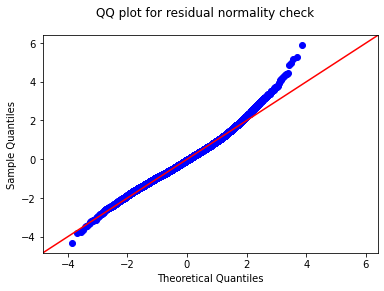

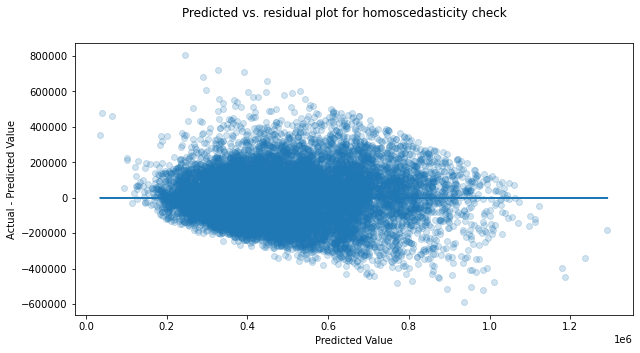

In [62]:
X2_preds = kcdf_clean[['sqft_living',
                      'sqft_basement',
                      'bedrooms',
                      'bathrooms',
                      'floors',
                      'yr_built',
                      'cond_Fair',
                      'cond_Good',
                      'cond_Very Good',
                      'grade_11 Excellent',
                      'grade_3 Poor',
                      'grade_4 Low',
                      'grade_5 Fair',
                      'grade_6 Low Average',
                      'grade_7 Average',
                      'grade_8 Good',
                      'grade_9 Better',
                      'waterfront',
                      'view_YES']]


reg_qq_sced(y_target, X2_preds)

**Findings**

* Adjusted R-squared stays at 57.5%
* The MAE is up a bit to 106248.25


### Checking Assumptions of the All Home Features

#### Linearity

As with previous models, this **assumption is met**.

#### Normality

We can see from the Q-Q plot above and the D-W score of 1.975 that this model **meets the normality assumption**.

#### Homoscedasticity

Based on the plot above and the GQ test results, this model still **fails the homoscedasticity assumption**.

In [63]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X2_preds)
list(zip(name, test))

[('F statistic', 0.9752961617970702), ('p-value', 0.8741801858786602)]

# Recommendations

In our final model comprising of all features except that of `cond_Poor`, `grade_12 Luxury`, and `reno_status`, our model's performance based on its adjusted R-squared improved from 38.98 percent to 57.5 percent.

Further, the Mean Absolute Error improved from our baseline score of 131878.02 to 106248.25, which is good.

In our final model, all features have a statistically significant linear relationship with sale price.

* While holding all other variables constant, the addition of a bathroom increases sale price by 29,020 dollars
* While holding all other variables constant, the addition of one floor level increases sale price by 41,040 dollars
* While holding all other variables constant, improving a home's condition from Average to Very Good increases sale price by 38,810 dollars
* While holding all other variables constant, improving a home's grade from Better to High Quality increases sale price by 82,180 dollars

**Thus, Emerald City Realtors make the following recommendations to prospective home sellers**:

1. Improve the grade of your home (construction quality) at a minimum to High Quality. An improvement from Better to High Quality is predicted to increase the sale price by 82,180 dollars
2. Adding an additional bathroom to your home is predicted to increase its sale price by 29,020 dollars
3. Each additional square foot of living space is predicted to add 81.12 dollars to the sale price; a 600-square foot addition would be predicted to increase the sale price by 48,672

***

**Limitations**
Our model only explains 57.5 percent of the variation in sale price, so we ought to be cautious with our predictions and conclusions. Further, our final model does have high levels of heteroscedasticity, which violates one of the assumptions of linear regression, such that our conclusions may be premature without additional manipulation of the data.

**Next Steps**:

* Collect more recent sales data for more accurate representation of the market
* Investigate influence of zipcode on sale price